#### project 2 - Stock Market API Project

In [55]:
%pip install python-dotenv plotly nbformat

Note: you may need to restart the kernel to use updated packages.


#### load the api key from.env file

In [56]:
from dotenv import load_dotenv
load_dotenv()

True

In [57]:
import os
api_key = os.getenv("API_KEY")

#### Get the company stop symbol

In [58]:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"datatype":"json","keywords":"State Bank of India","function":"SYMBOL_SEARCH"}

headers = {
	"x-rapidapi-key": api_key,
	"x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

(response.json())

{'bestMatches': [{'1. symbol': 'SBIN.BSE',
   '2. name': 'State Bank of India',
   '3. type': 'Equity',
   '4. region': 'India/Bombay',
   '5. marketOpen': '09:15',
   '6. marketClose': '15:30',
   '7. timezone': 'UTC+5.5',
   '8. currency': 'INR',
   '9. matchScore': '1.0000'},
  {'1. symbol': 'SBKFF',
   '2. name': 'State Bank of India',
   '3. type': 'Equity',
   '4. region': 'United States',
   '5. marketOpen': '09:30',
   '6. marketClose': '16:00',
   '7. timezone': 'UTC-04',
   '8. currency': 'USD',
   '9. matchScore': '1.0000'},
  {'1. symbol': 'SID.FRK',
   '2. name': 'State Bank of India',
   '3. type': 'Equity',
   '4. region': 'Frankfurt',
   '5. marketOpen': '08:00',
   '6. marketClose': '20:00',
   '7. timezone': 'UTC+02',
   '8. currency': 'EUR',
   '9. matchScore': '1.0000'},
  {'1. symbol': 'SBID.LON',
   '2. name': 'State Bank of India GDR',
   '3. type': 'Equity',
   '4. region': 'United Kingdom',
   '5. marketOpen': '08:00',
   '6. marketClose': '16:30',
   '7. timez

####

In [59]:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"function":"TIME_SERIES_DAILY","symbol":"SBIN.BSE","outputsize":"compact","datatype":"json"}

headers = {
	"x-rapidapi-key": api_key,
	"x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

data = response.json()

In [60]:
data.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [61]:
daily = data["Time Series (Daily)"]

In [62]:
import pandas as pd
df = pd.DataFrame(daily).T
df

,1. open,2. high,3. low,4. close,5. volume
2025-01-02,795.0000,802.4000,786.3000,801.0500,711599
2025-01-01,796.8500,798.5000,789.6000,793.3500,356031
2024-12-31,788.7500,798.9500,787.0000,795.0500,283620
2024-12-30,802.7000,808.0000,785.2000,788.3000,686161
2024-12-27,817.2500,818.7500,797.2500,799.5500,1061163
...,...,...,...,...,...
2024-08-14,800.7000,809.0000,800.4000,802.9500,287718
2024-08-13,813.1000,819.4000,795.1000,797.3000,641102
2024-08-12,819.2000,822.6000,810.8500,813.0000,1142861
2024-08-09,816.8000,829.9000,809.8500,824.2000,822817


In [63]:
df.dtypes

1. open      object
2. high      object
3. low       object
4. close     object
5. volume    object
dtype: object

In [64]:
df = df.astype(float).round(2)

In [65]:
df

,1. open,2. high,3. low,4. close,5. volume
2025-01-02,795.00,802.40,786.30,801.05,711599.0
2025-01-01,796.85,798.50,789.60,793.35,356031.0
2024-12-31,788.75,798.95,787.00,795.05,283620.0
2024-12-30,802.70,808.00,785.20,788.30,686161.0
2024-12-27,817.25,818.75,797.25,799.55,1061163.0
...,...,...,...,...,...
2024-08-14,800.70,809.00,800.40,802.95,287718.0
2024-08-13,813.10,819.40,795.10,797.30,641102.0
2024-08-12,819.20,822.60,810.85,813.00,1142861.0
2024-08-09,816.80,829.90,809.85,824.20,822817.0


In [66]:
df.dtypes

1. open      float64
2. high      float64
3. low       float64
4. close     float64
5. volume    float64
dtype: object

In [67]:
# concert index to datatime
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2025-01-02', '2025-01-01', '2024-12-31', '2024-12-30',
               '2024-12-27', '2024-12-26', '2024-12-24', '2024-12-23',
               '2024-12-20', '2024-12-19', '2024-12-18', '2024-12-17',
               '2024-12-16', '2024-12-13', '2024-12-12', '2024-12-11',
               '2024-12-10', '2024-12-09', '2024-12-06', '2024-12-05',
               '2024-12-04', '2024-12-03', '2024-12-02', '2024-11-29',
               '2024-11-28', '2024-11-27', '2024-11-26', '2024-11-25',
               '2024-11-22', '2024-11-21', '2024-11-19', '2024-11-18',
               '2024-11-14', '2024-11-13', '2024-11-12', '2024-11-11',
               '2024-11-08', '2024-11-07', '2024-11-06', '2024-11-05',
               '2024-11-04', '2024-10-31', '2024-10-30', '2024-10-29',
               '2024-10-28', '2024-10-25', '2024-10-24', '2024-10-23',
               '2024-10-22', '2024-10-21', '2024-10-18', '2024-10-17',
               '2024-10-16', '2024-10-15', '2024-10-14', '2024-10-11',
      

In [68]:
df

,1. open,2. high,3. low,4. close,5. volume
2025-01-02,795.00,802.40,786.30,801.05,711599.0
2025-01-01,796.85,798.50,789.60,793.35,356031.0
2024-12-31,788.75,798.95,787.00,795.05,283620.0
2024-12-30,802.70,808.00,785.20,788.30,686161.0
2024-12-27,817.25,818.75,797.25,799.55,1061163.0
...,...,...,...,...,...
2024-08-14,800.70,809.00,800.40,802.95,287718.0
2024-08-13,813.10,819.40,795.10,797.30,641102.0
2024-08-12,819.20,822.60,810.85,813.00,1142861.0
2024-08-09,816.80,829.90,809.85,824.20,822817.0


In [69]:
df.index.name = "Date"

In [70]:
df

,1. open,2. high,3. low,4. close,5. volume
Date,,,,,
2025-01-02,795.00,802.40,786.30,801.05,711599.0
2025-01-01,796.85,798.50,789.60,793.35,356031.0
2024-12-31,788.75,798.95,787.00,795.05,283620.0
2024-12-30,802.70,808.00,785.20,788.30,686161.0
2024-12-27,817.25,818.75,797.25,799.55,1061163.0
...,...,...,...,...,...
2024-08-14,800.70,809.00,800.40,802.95,287718.0
2024-08-13,813.10,819.40,795.10,797.30,641102.0
2024-08-12,819.20,822.60,810.85,813.00,1142861.0


In [71]:
df.to_csv("SBIPrice.csv")

#### visulaize the data with candlestick chart

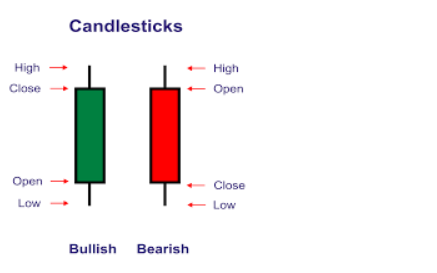

In [72]:
df.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

In [73]:
import plotly.graph_objects as go

In [74]:
fig = go.Figure(
    data = [
        go.Candlestick(
            x = df. index,
            open = df["1. open"],
            high = df["2. high"],
            low = df["3. low"],
            close = df["4. close"]

        )
    ]
)

fig.update_layout(width=1200, height=800)
fig.show()

### create a class to get stock details for any stock

In [75]:
class StockAPI:

    def __init__(self):
        self.url = "https://alpha-vantage.p.rapidapi.com/query"
        self.headers = {
            "x-rapidapi-key": os.getenv("API_KEY"),
            "x-rapidapi-host": "alpha-vantage.p.rapidapi.com",
        }

    def search_symbol(self, company_name):
        querystring = {
            "datatype": "json",
            "keywords": company_name,
            "function": "SYMBOL_SEARCH",
        }
        response = requests.get(self.url, headers=self.headers, params=querystring)
        return response.json()

    def get_stock_data(self, symbol):
        querystring = {
            "function": "TIME_SERIES_DAILY",
            "symbol": symbol,
            "outputsize": "compact",
            "datatype": "json",
        }
        response = requests.get(url, headers=self.headers, params=querystring)
        data = response.json()["Time Series (Daily)"]
        df = pd.DataFrame(data).T
        df = df.astype(float).round(2)
        df.index = pd.to_datetime(df.index)
        df.index.name = "Date"
        return df

    def plot_candlestick(self, df):
        fig = go.Figure(
            data=[
                go.Candlestick(
                    x=df.index,
                    open=df["1. open"],
                    high=df["2. high"],
                    low=df["3. low"],
                    close=df["4. close"],
                )
            ]
        )
        fig.update_layout(width=1200, height=800)
        fig.show()

In [76]:
client = StockAPI()

In [77]:
client.search_symbol(company_name= "HDFC Bank")

{'bestMatches': [{'1. symbol': 'HDB',
   '2. name': 'HDFC Bank Ltd',
   '3. type': 'Equity',
   '4. region': 'United States',
   '5. marketOpen': '09:30',
   '6. marketClose': '16:00',
   '7. timezone': 'UTC-04',
   '8. currency': 'USD',
   '9. matchScore': '0.8182'},
  {'1. symbol': 'HDFCBANK.BSE',
   '2. name': 'HDFC Bank Limited',
   '3. type': 'Equity',
   '4. region': 'India/Bombay',
   '5. marketOpen': '09:15',
   '6. marketClose': '15:30',
   '7. timezone': 'UTC+5.5',
   '8. currency': 'INR',
   '9. matchScore': '0.8000'},
  {'1. symbol': 'H1DB34.SAO',
   '2. name': 'HDFC Bank Limited',
   '3. type': 'Equity',
   '4. region': 'Brazil/Sao Paolo',
   '5. marketOpen': '10:00',
   '6. marketClose': '17:30',
   '7. timezone': 'UTC-03',
   '8. currency': 'BRL',
   '9. matchScore': '0.6923'},
  {'1. symbol': 'HDFA.FRK',
   '2. name': 'HDFC Bank Limited',
   '3. type': 'Equity',
   '4. region': 'Frankfurt',
   '5. marketOpen': '08:00',
   '6. marketClose': '20:00',
   '7. timezone': 'UT

In [78]:
df2 = client.get_stock_data(symbol= "HDFCBANK.BSE")

In [79]:
df2

,1. open,2. high,3. low,4. close,5. volume
Date,,,,,
2025-01-02,1780.50,1803.00,1774.10,1793.35,79075.0
2025-01-01,1775.00,1794.40,1762.00,1782.45,110695.0
2024-12-31,1770.05,1781.35,1768.00,1772.45,107155.0
2024-12-30,1794.95,1815.00,1771.35,1778.70,292506.0
2024-12-27,1790.25,1803.00,1789.50,1797.85,218692.0
...,...,...,...,...,...
2024-08-16,1622.00,1634.60,1611.60,1632.35,977686.0
2024-08-14,1607.90,1613.55,1603.10,1607.90,305981.0
2024-08-13,1628.00,1631.55,1601.20,1603.60,970561.0


In [80]:
df2.to_csv("HDFCPrice.csv")

In [81]:
client.plot_candlestick(df2)

#### Get the details for Tesla stock from us

In [84]:
client.search_symbol(company_name="Tesla")

{'bestMatches': [{'1. symbol': 'TSLA',
   '2. name': 'Tesla Inc',
   '3. type': 'Equity',
   '4. region': 'United States',
   '5. marketOpen': '09:30',
   '6. marketClose': '16:00',
   '7. timezone': 'UTC-04',
   '8. currency': 'USD',
   '9. matchScore': '0.8889'},
  {'1. symbol': 'TL0.DEX',
   '2. name': 'Tesla Inc',
   '3. type': 'Equity',
   '4. region': 'XETRA',
   '5. marketOpen': '08:00',
   '6. marketClose': '20:00',
   '7. timezone': 'UTC+02',
   '8. currency': 'EUR',
   '9. matchScore': '0.7143'},
  {'1. symbol': 'TL0.FRK',
   '2. name': 'Tesla Inc',
   '3. type': 'Equity',
   '4. region': 'Frankfurt',
   '5. marketOpen': '08:00',
   '6. marketClose': '20:00',
   '7. timezone': 'UTC+02',
   '8. currency': 'EUR',
   '9. matchScore': '0.7143'},
  {'1. symbol': 'TSLA34.SAO',
   '2. name': 'Tesla Inc',
   '3. type': 'Equity',
   '4. region': 'Brazil/Sao Paolo',
   '5. marketOpen': '10:00',
   '6. marketClose': '17:30',
   '7. timezone': 'UTC-03',
   '8. currency': 'BRL',
   '9. ma

In [86]:
df3 = client.get_stock_data(symbol= "TSLA")

In [87]:
df3

,1. open,2. high,3. low,4. close,5. volume
Date,,,,,
2025-01-02,390.10,392.73,373.04,379.28,109710749.0
2024-12-31,423.79,427.93,402.54,403.84,76825121.0
2024-12-30,419.40,427.00,415.75,417.41,64941012.0
2024-12-27,449.52,450.00,426.50,431.66,82666821.0
2024-12-26,465.16,465.33,451.02,454.13,76651210.0
...,...,...,...,...,...
2024-08-16,211.15,219.80,210.80,216.12,88765122.0
2024-08-15,205.02,215.88,204.82,214.14,89848530.0
2024-08-14,207.39,208.44,198.75,201.38,70250014.0


In [88]:
client.plot_candlestick(df3)